In [2]:
from __future__ import print_function, division
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# mpl.rcParams['font.sans-serif'] = ['NotoSansCJK-Medium'] # 指定默认字体
# mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题p
mpl.rcParams['figure.figsize'] = [12, 8]

In [17]:
suffix_filenames = ['context', 'question', 'answer', 'span']

# create a dataframe
df = pd.DataFrame()
words = []
for name in suffix_filenames:
    with open('../data/train.' + name) as f:
        df[name] = f.read().splitlines()
        words += list(df[name].str.split())


In [24]:
flatten_words = [w for ws in words for w in ws]
# 统计单词长度
word_length = map(len, flatten_words)

In [32]:
word_length_series = pd.Series(word_length, dtype=int)
word_length_series.describe(percentiles=[.50, .75, .95, .9999])

count     1.334414e+07
mean      4.591156e+00
std       2.971694e+00
min       1.000000e+00
50%       4.000000e+00
75%       7.000000e+00
95%       1.000000e+01
99.99%    2.300000e+01
max       6.000000e+01
dtype: float64

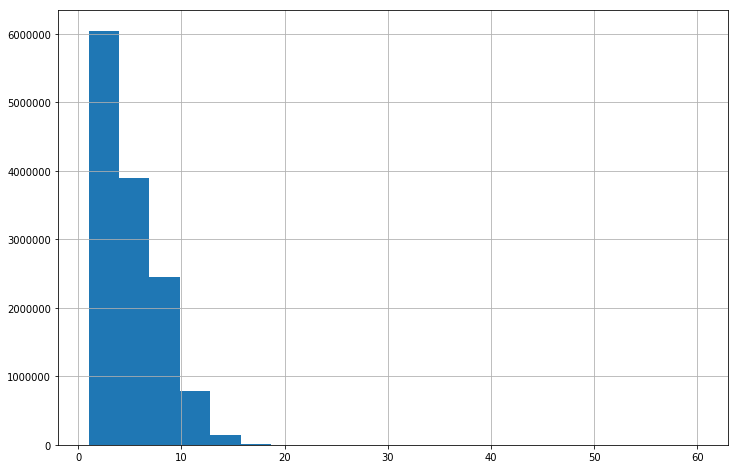

In [26]:
word_length_series.hist(bins=20)

In [6]:
# 统计各种长度信息
length = df['span'].str.split(' ', expand=True, n=2).astype(int)
length.columns = ['start', 'end']

for suffix in suffix_filenames[:-1]:
    length[suffix + '_chars_len'] = df[suffix].str.len()
    length[suffix + '_len'] = df[suffix].str.split().str.len()

In [6]:
length.head()

start  end  context_chars_len  context_len  question_chars_len  \
0      0    0               1202          187                  45   
1     32   32                737          124                  42   
2     19   21                702          132                  70   
3    206  206               1436          255                  46   
4     46   48               1417          304                  60   

   question_len  answer_chars_len  answer_len  
0             9                11           1  
1             8                 7           1  
2            13                18           3  
3             9                 7           1  
4            11                12           3

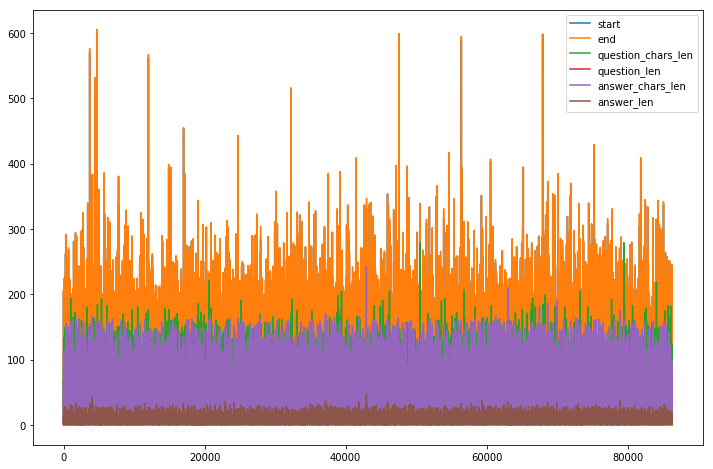

In [7]:
length.filter(regex="^(?!(context_len|context_chars_len)$)").plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f86c53861d0>,
      dtype=object)

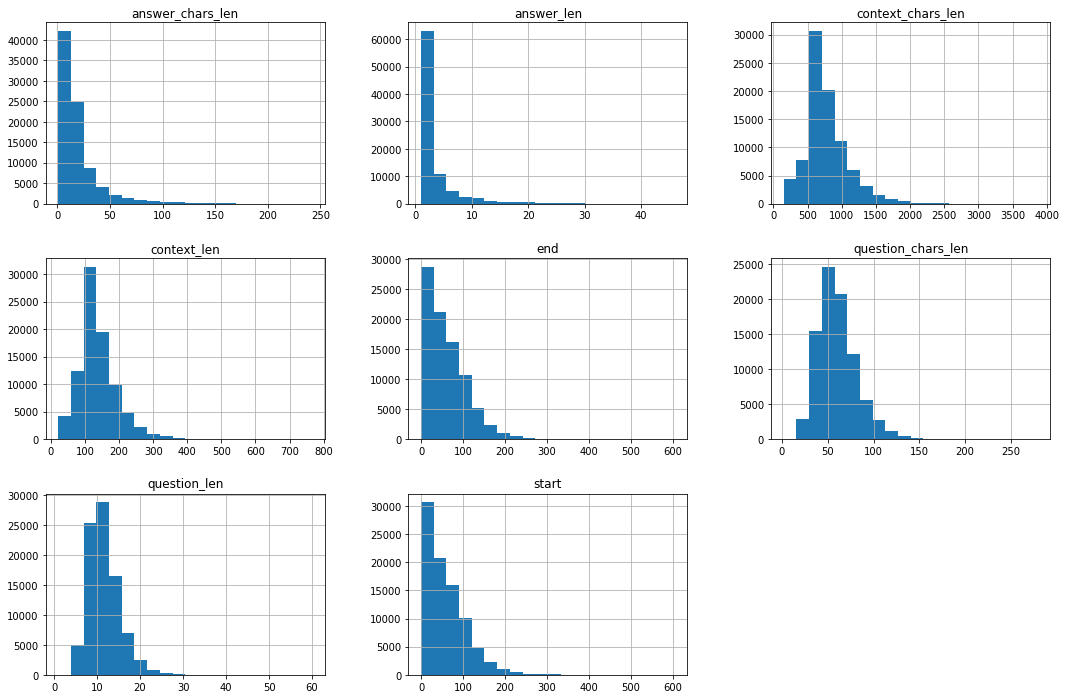

In [8]:
length.hist(bins=20, figsize=(18,12))

Text(0.5,0,'count')

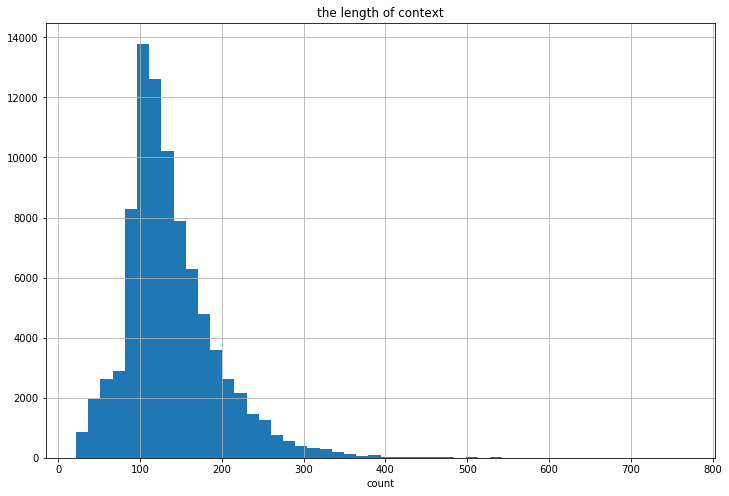

In [9]:
axes = length['context_len'].hist(bins=50)
axes.set_title('the length of context')
axes.set_xlabel('count')

Text(0.5,1,'the length of question')

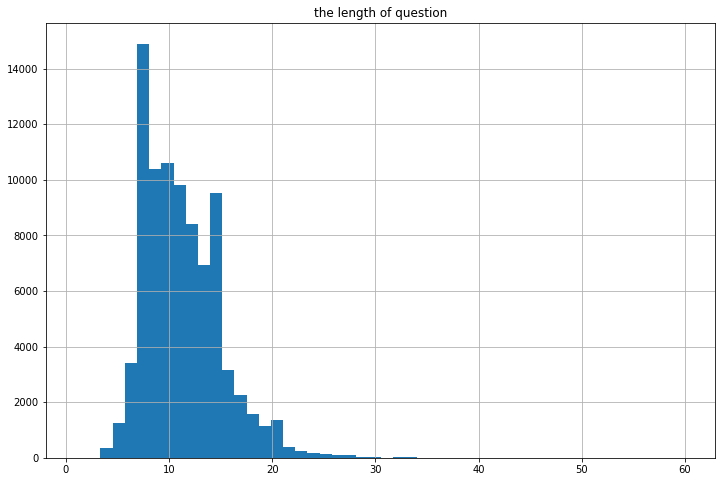

In [10]:
# 问题长度
axes = length['question_len'].hist(bins=50)
axes.set_title('the length of question')

Text(0.5,1,'the length of answer_words')

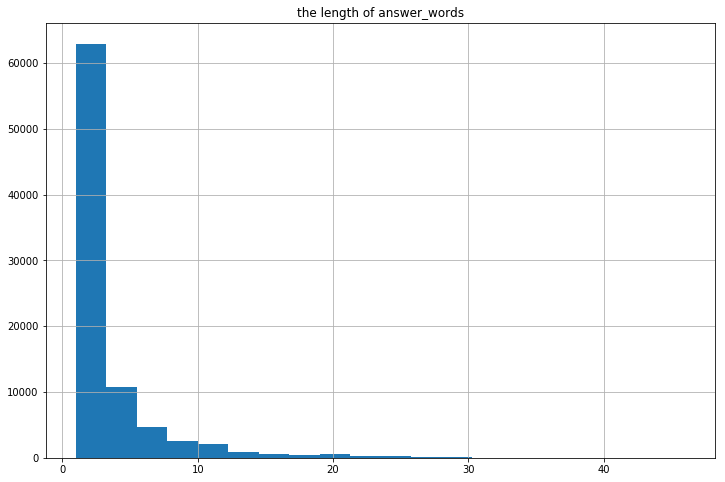

In [11]:
# 答案长度
axes = length['answer_len'].hist(bins=20)
axes.set_title('the length of answer_words')

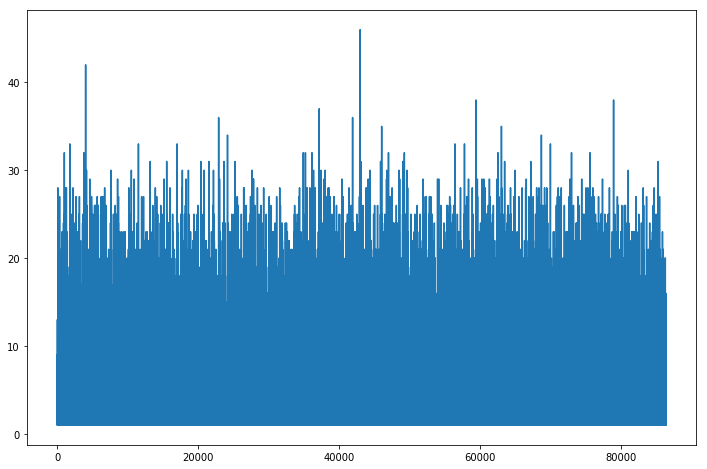

In [12]:
length['answer_len'].plot()

In [13]:
length['answer_len'].describe(percentiles=[.50, .75, .95, .99])

count    86326.000000
mean         3.382851
std          3.781420
min          1.000000
50%          2.000000
75%          4.000000
95%         11.000000
99%         21.000000
max         46.000000
Name: answer_len, dtype: float64

In [14]:
length['context_len'].describe(percentiles=[.50, .75, .95, .99])

count    86326.000000
mean       137.905359
std         56.889364
min         22.000000
50%        127.000000
75%        164.000000
95%        245.000000
99%        325.000000
max        766.000000
Name: context_len, dtype: float64

In [15]:
length['question_len'].describe(percentiles=[.50, .75, .95, .99])

count    86326.000000
mean        11.290237
std          3.719476
min          1.000000
50%         11.000000
75%         13.000000
95%         18.000000
99%         23.000000
max         60.000000
Name: question_len, dtype: float64